## Ⅰ. Basic Line Plot

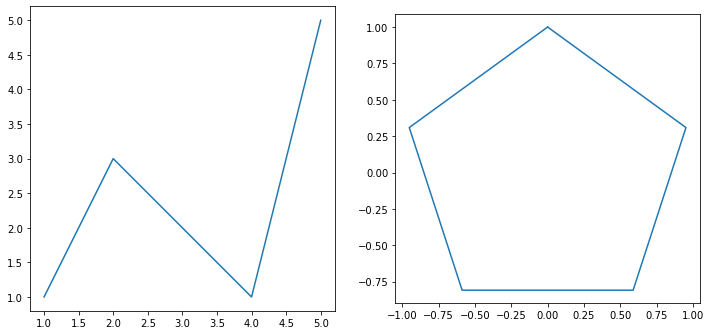

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 7), subplot_kw={'aspect':1})

x1 = [1, 2, 3, 4, 5]
y1 = [1, 3, 2, 1, 5]

axes[0].plot(x1, y1)

n = 6
x2 = np.sin(np.linspace(0, 2*np.pi, n))
y2 = np.cos(np.linspace(0, 2*np.pi, n))

axes[1].plot(x2, y2)

plt.show()

Line plot의 3가지 요소를 다음과 같은 파라미터로 변경할 수 있다.
- color
- marker
- linestyle 

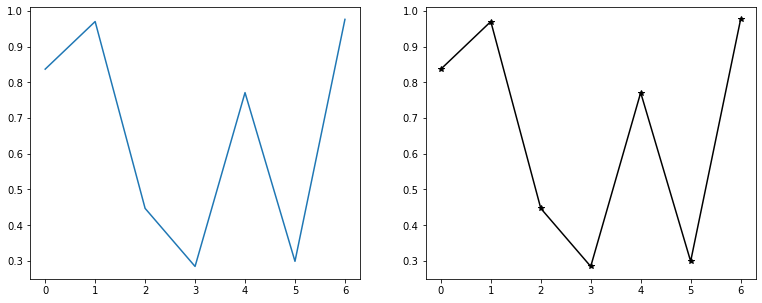

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

np.random.seed(97)
x = np.arange(7)
y = np.random.rand(7)

axes[0].plot(x, y)
axes[1].plot(x, y, color='black', marker='*', linestyle='solid')
plt.show()

## Ⅱ. Smoothing

예시를 위해 주식 데이터 사용한다.

In [3]:
stock = pd.read_csv('data/prices.csv')
stock
stock['date'] = pd.to_datetime(stock['date'], format='%Y-%m-%d', errors='raise')
stock.set_index("date", inplace = True)
apple = stock[stock['symbol']=='AAPL']
google = stock[stock['symbol']=='GOOGL']

데이터를 생으로 사용하면 다음과 같이 노이즈가 큰것을 볼 수 있다.

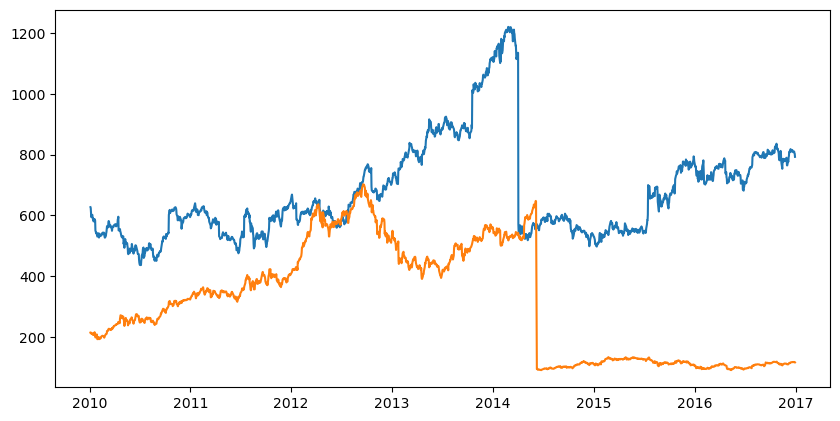

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=100)

ax.plot(google.index, google['close'])
ax.plot(apple.index, apple['close'])

plt.show()

이러한 노이즈를 smoothing하는 방법으로는 크게 2개의 방법이 있다.
1. 이동평균을 사용한 방식
2. 보간을 사용한 방식

### 1. 이동평균을 사용한 방식

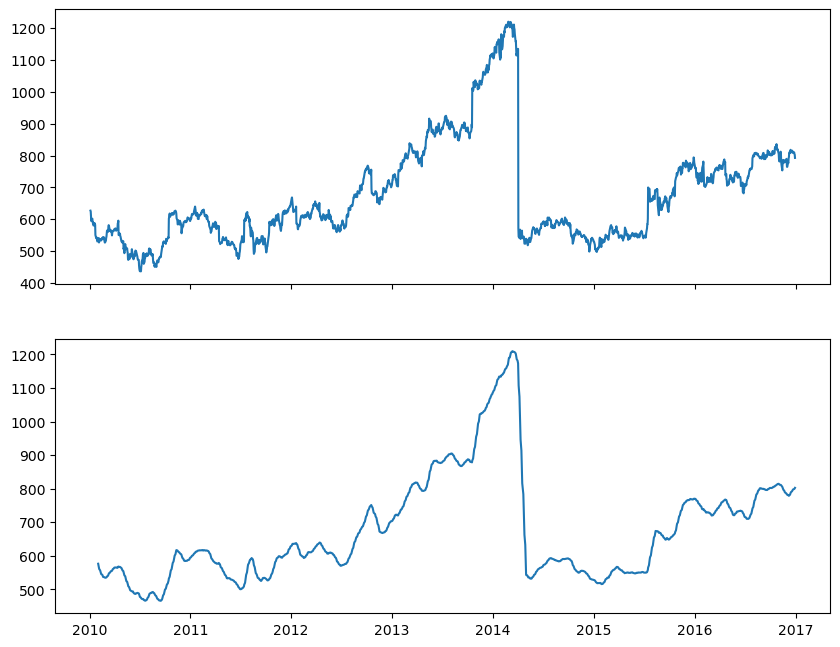

In [5]:
google_rolling = google.rolling(window=20).mean()
fig, axes = plt.subplots(2, 1, figsize=(10, 8), dpi=100, sharex=True)

axes[0].plot(google.index, google['close'])
axes[1].plot(google_rolling.index, google_rolling['close'])

plt.show()

### 2. 보간을 사용한 방식

참고 : https://www.delftstack.com/howto/matplotlib/matplotlib-plot-smooth-curve/

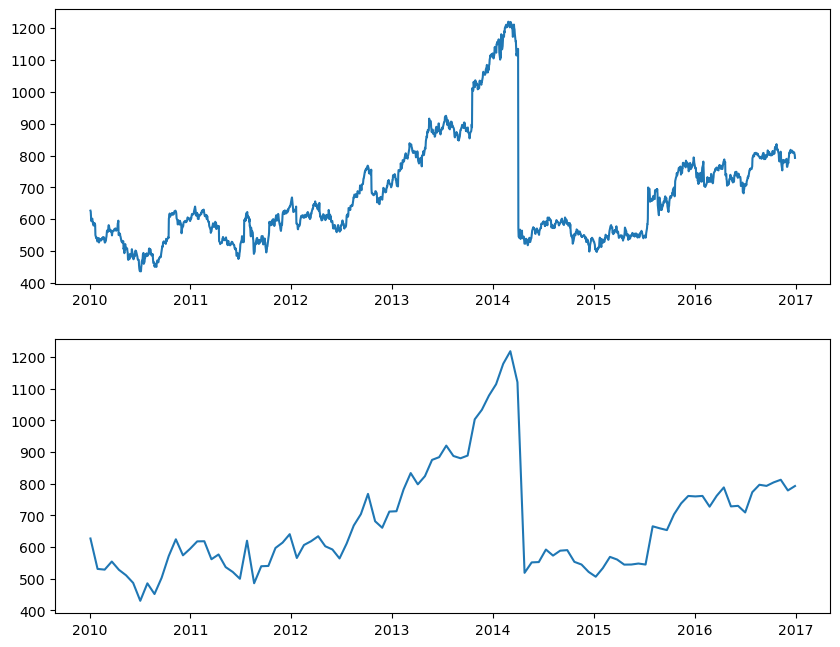

In [6]:
from scipy.interpolate import make_interp_spline, interp1d
import matplotlib.dates as dates

fig, ax = plt.subplots(2, 1, figsize=(10, 8), dpi=100)

date_np = google.index
value_np = google['close']

date_num = dates.date2num(date_np)

date_num_smooth = np.linspace(date_num.min(), date_num.max(), 100) 
spl = make_interp_spline(date_num, value_np, k=3)
value_np_smooth = spl(date_num_smooth)

ax[0].plot(date_np, value_np)
ax[1].plot(dates.num2date(date_num_smooth), value_np_smooth)

plt.show()

## Ⅲ. Grid Line Plot

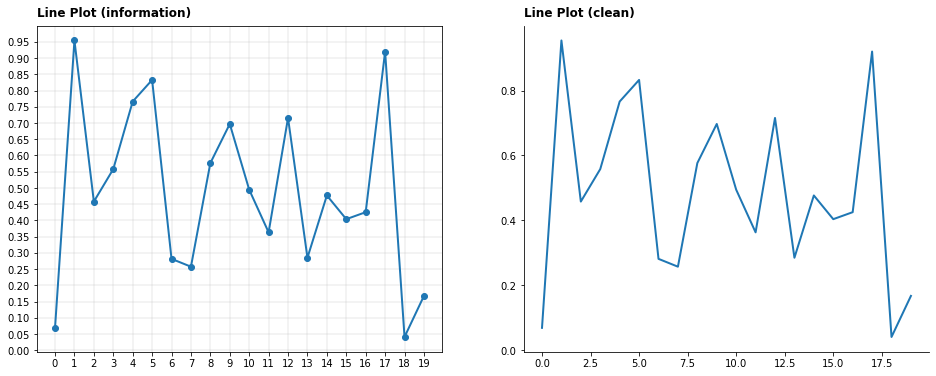

In [7]:
from matplotlib.ticker import MultipleLocator

np.random.seed(970725)
x = np.arange(20)
y = np.random.rand(20)

fig = plt.figure(figsize=(16, 6))

# With Grid
ax1 = fig.add_subplot(121)
ax1.plot(x, y, marker='o', linewidth=2)
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(0.05))    
ax1.grid(linewidth=0.3)
ax1.set_title(f"Line Plot (information)", loc='left', fontsize=12, va= 'bottom', fontweight='semibold')

# Without Grid
ax2 = fig.add_subplot(122)
ax2.plot(x, y, linewidth=2,)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_title(f"Line Plot (clean)", loc='left', fontsize=12, va= 'bottom', fontweight='semibold')

plt.show()

## Ⅳ. Double Axis Line Plot

### 1. Twinx

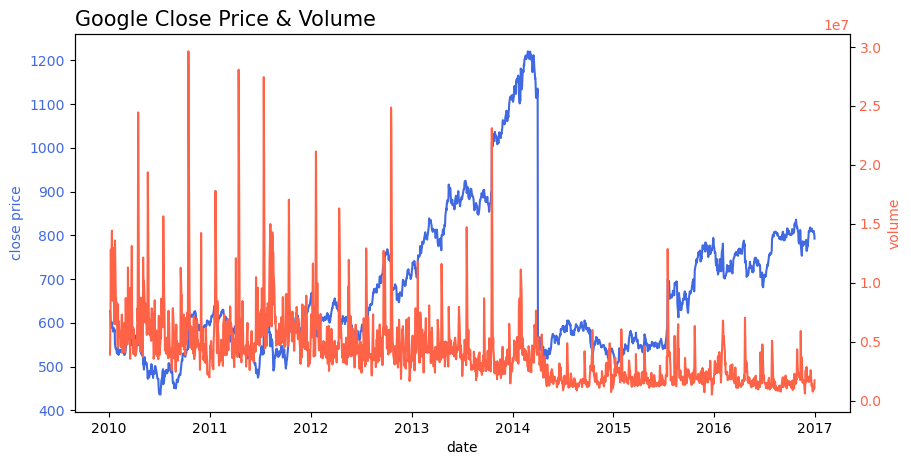

In [8]:
fig, ax1 = plt.subplots(figsize=(10, 5), dpi=100)

# First Plot
color = 'royalblue'
ax1.plot(google.index, google['close'], color=color)
ax1.set_xlabel('date')
ax1.set_ylabel('close price', color=color)  
ax1.tick_params(axis='y', labelcolor=color)

# # Second Plot
color = 'tomato'
ax2 = ax1.twinx()  
ax2.plot(google.index, google['volume'], color=color)
ax2.set_ylabel('volume', color=color)  
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Google Close Price & Volume', loc='left', fontsize=15)
plt.show()

### 2. Secondary Axis

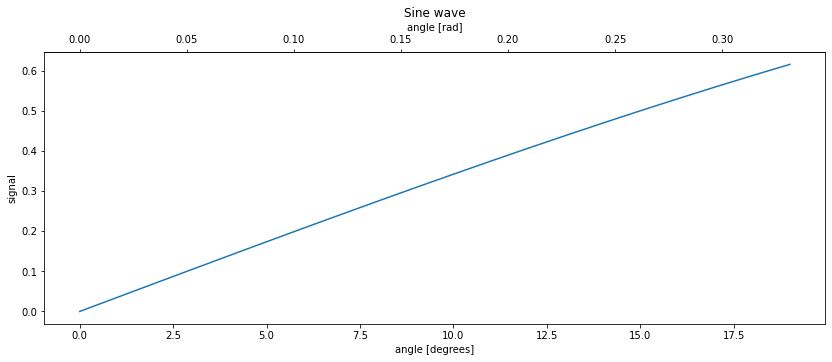

In [9]:
bx = np.arange(0, 360)
y = np.sin(2 * x * np.pi / 180)

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(x, y)
ax.set_xlabel('angle [degrees]')
ax.set_ylabel('signal')
ax.set_title('Sine wave')
secax = ax.secondary_xaxis('top', functions=(np.radians, np.degrees))
secax.set_xlabel('angle [rad]')
plt.show()

## Ⅴ. Line Plot with Legends

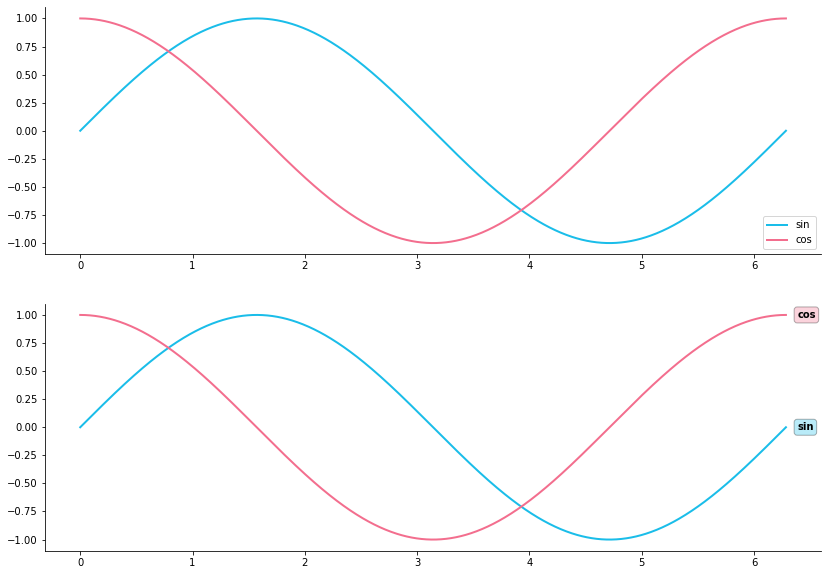

In [10]:
x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

fig, axes = plt.subplots(2, 1, figsize=(14, 10), subplot_kw={'aspect':1})

axes[0].plot(x, y1, color='#1ABDE9', linewidth=2, label='sin')
axes[0].plot(x, y2, color='#F36E8E', linewidth=2, label='cos')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].legend(loc='lower right')

axes[1].plot(x, y1, color='#1ABDE9', linewidth=2,)
axes[1].plot(x, y2, color='#F36E8E', linewidth=2,)
axes[1].text(x[-1]+0.1, y1[-1], s='sin', fontweight='bold', va='center', ha='left', 
         bbox=dict(boxstyle='round,pad=0.3', fc='#1ABDE9', ec='black', alpha=0.3))
axes[1].text(x[-1]+0.1, y2[-1], s='cos', fontweight='bold', va='center', ha='left', 
         bbox=dict(boxstyle='round,pad=0.3', fc='#F36E8E', ec='black', alpha=0.3))
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.show()

## Ⅵ. Line Plot with Min and Max

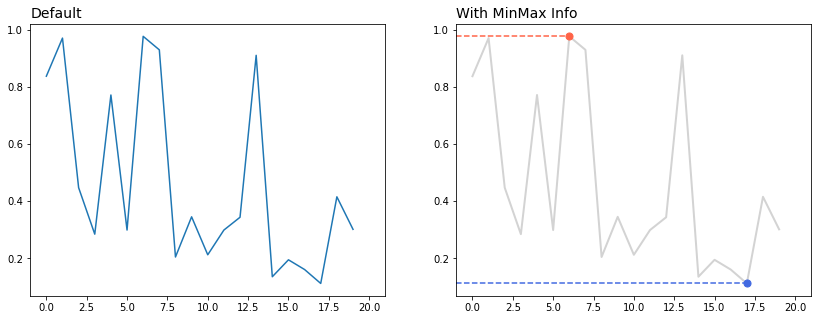

In [11]:
np.random.seed(97)
x = np.arange(20)
y = np.random.rand(20)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(x, y)
axes[0].set_xlim(-1, 21)
axes[0].set_title('Default', loc='left', fontsize=14, fontweight='medium')

axes[1].plot(x, y, color='lightgray', linewidth=2,)
axes[1].set_xlim(-1, 21)
axes[1].plot([-1, x[np.argmax(y)]], [np.max(y)]*2, linestyle='--', color='tomato')
axes[1].plot([-1, x[np.argmin(y)]], [np.min(y)]*2, linestyle='--', color='royalblue')
axes[1].scatter(x[np.argmax(y)], np.max(y), c='tomato', s=50, zorder=20)
axes[1].scatter(x[np.argmin(y)], np.min(y), c='royalblue', s=50, zorder=20)
axes[1].set_title('With MinMax Info', loc='left', fontsize=14, fontweight='medium')

plt.show()